<a href="https://colab.research.google.com/github/Abdelrhman-Elmashtoly/Target-Based-Sentiment-Analysis-For-Egyptian-Dialect/blob/main/sentiment_analizing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PIP installion 

In [ ]:
!pip install pyarabic
!pip install emoji
!pip install pystemmer
!pip install optuna==2.3.0
!pip install farasapy
!pip install plotly==5.9.0
!pip install emot
!pip install transformers
!git clone https://github.com/aub-mind/arabert.git
!pip install arabic_reshaper
!pip install bidi.algorithm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 698.7/698.7 kB 2.8 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [10 lines of output]
      Traceback (most recent call last):
        File "<string>", line 36, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-k_cyqkzh/pystemmer_b4f4df7809a24335b94013c4e9a1ac1a/setup.py", line 199, in <module>
          ['src/Stemmer.pyx'] + list(LIBRARY_SOURCE_CODE.source_code_paths()),
        File "/tmp/pip-install-k_cyqkzh/pystemmer_b4f4df7809a24335b94013c4e9a1ac1a/setup.py", line 85, in source_code_paths
          for line in self.iter_manifest_lines():
        File "/tmp/pip-install-k_cyqkzh/pystemmer_b4f4df7809a24335b94013c4e9a1ac1a/setup.py", line 74, in iter_manifest_lines
          with open(self.manifest_file_path) as file:
      FileNotFoundError: [Errno

In [ ]:
!pip uninstall emoji --yes

Found existing installation: emoji 2.2.0
Uninstalling emoji-2.2.0:
  Successfully uninstalled emoji-2.2.0


In [ ]:
!pip install emoji==1.7 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 1.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=dce5510572fadec17b4debd7370ca0d4ffd69d4ff4a6be8677fee7114796c684
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


# Libraries

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 
import seaborn as sns
from emot.emo_unicode import UNICODE_EMOJI ,EMOJI_UNICODE, EMOTICONS_EMO
import re
import string
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from arabert.preprocess import ArabertPreprocessor
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification,BertForSequenceClassification, AutoModelForMaskedLM,BertForPreTraining 
init_notebook_mode(connected=True)  

import arabic_reshaper
from sklearn import preprocessing
import tensorflow as tf
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from keras_preprocessing.sequence import pad_sequences

# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier 
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.model_selection import cross_val_score
# from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.model_selection import validation_curve
# from sklearn.metrics import ConfusionMatrixDisplay
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import GradientBoostingClassifier
# from wordcloud import WordCloud
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_extraction.text import CountVectorizer
import time

# Import Pretrained model

In [ ]:
model1_name="aubmindlab/bert-base-arabertv02-twitter"
model2_name="aubmindlab/aragpt2-mega"
model3_name='aubmindlab/bert-base-arabertv02'
model4_name='aubmindlab/bert-large-arabertv02-twitter'
model5_name='aubmindlab/bert-base-arabertv2'
model6_name='UBC-NLP/MARBERT'

arabert_prep = ArabertPreprocessor(model_name=model1_name)

tokenizer = AutoTokenizer.from_pretrained(model1_name)
deep_model = AutoModelForSequenceClassification.from_pretrained(model1_name, num_labels=3)

Downloading:   0%|          | 0.00/476 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/733k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.19M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/667 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/516M [00:00<?, ?B/s]

Some weights of the model checkpoint at aubmindlab/bert-base-arabertv02-twitter were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmi

# Reading Data

In [ ]:
data= pd.read_csv("/kaggle/input/TrainData/Hotel_data_7.csv")
data.columns = ['text','target','polarity']
data

,text,target,polarity
0,أنصح بالنوم وليس تناول الطعام موقع مثالي للإق...,موقع,1
1,كانت الغرفة ممتازة وكذلك الموظفون وبوفيه الإفط...,الغرفة,1
2,كانت الغرفة ممتازة وكذلك الموظفون وبوفيه الإفط...,الموظفون,1
3,كانت الغرفة ممتازة وكذلك الموظفون وبوفيه الإفط...,بوفيه الإفطار,1
4,كانت الغرفة ممتازة وكذلك الموظفون وبوفيه الإفط...,وجبة العشاء,-1
...,...,...,...
20162,' @wasfa_N الجمال مبيحتاح اي مكياج لناعم وله خ...,NaN,0
20163,' @TheMurexDor نتمني وجود الفنانة رنا سماحة اف...,NaN,0
20164,' ولد الهدى فالكائنات ضياء .. وفم الزمان تبسم ...,NaN,1
20165,' @mohamed71944156 @samarroshdy1 انت متناقض جد...,NaN,-1


# Pie chart for data

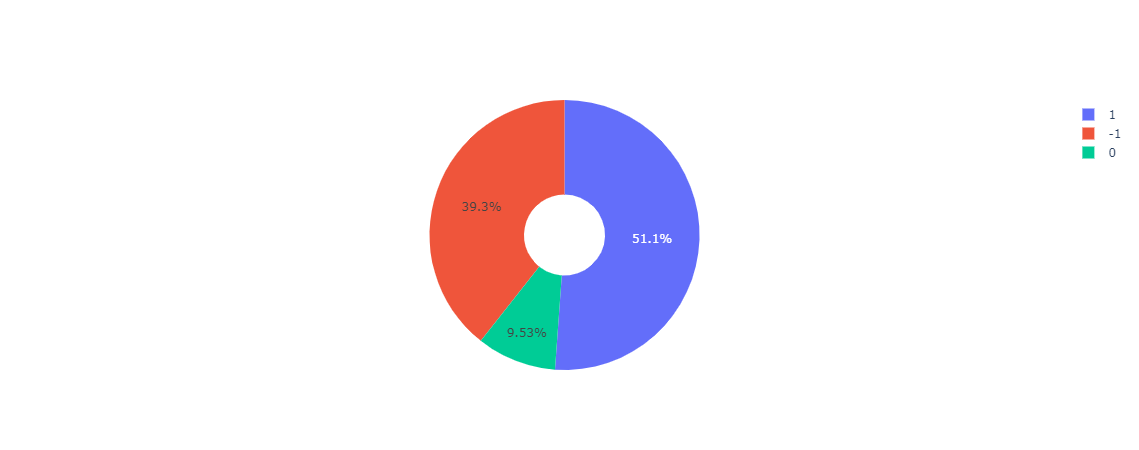

In [ ]:
labels = data['polarity'].value_counts().keys()
values = data['polarity'].value_counts()
# Plot pie chart 
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

# Data Cleaning 

In [ ]:
def convert_emojis(text):
    for emot in UNICODE_EMOJI:
        text = text.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(",","").replace(":","").split()))
    return text
def convert_emoticons(text):
    for emot in EMOTICONS_EMO:

        text = text.replace(emot, "_".join(EMOTICONS_EMO[emot].replace(",","").split()))
    return text

In [ ]:
def data_cleaning (text):
    # remove qutoions 
    text = text.strip()

    text= re.sub(r'http\S+', '', text)
    
    text= re.sub(r'ي+','ي', text)
    text = text.replace("آ", "ا")
    text = text.replace("إ", "ا")
    text = text.replace("أ", "ا")
    text = text.replace("ؤ", "و")
    text = text.replace("ئ", "ي")


    text= re.sub(r'[@|#]\S*', '',text)
    text= re.sub(r'"+', '', text)
    # Remove arabic signs
    #text= re.sub(r'([@A-Za-z0-9_ـــــــــــــ]+)|[^\w\s]|#|http\S+', '', text)
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
 
   
    

    # Remove repeated letters like "الللللللللللللللله" to "الله"
    text= text[0:2] + ''.join([text[i] for i in range(2, len(text)) if text[i]!=text[i-1] or text[i]!=text[i-2]])
    text= re.sub(r'D',':D', text)
    text= re.sub(r'هه+', 'face_with_tears_of_joy', text)
    text= convert_emojis(text)
    text= convert_emoticons(text)

     # Removing punctuations in string
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    text=re.sub(r'(?:^| )\w(?:$| )', ' ', text)
    text = re.sub(r"$\d+\W+|\b\d+\b|\W+\d+$", "", text)
    text = re.sub(" \d+", " ", text)
    text = re.sub("(\s\d+)","",text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub("(\s\d+)","",text) 
    # Returns: hi what is the weather like
    

    return text

In [ ]:
data['preprocessing'] =data.iloc[:,0].apply(lambda x:data_cleaning(x))
data['preprocessing'] =data['preprocessing'] .apply(lambda x:arabert_prep.preprocess(x))
data

,text,target,polarity,preprocessing
0,أنصح بالنوم وليس تناول الطعام موقع مثالي للإق...,موقع,1,انصح بالنوم وليس تناول الطعام موقع مثالي للاقا...
1,كانت الغرفة ممتازة وكذلك الموظفون وبوفيه الإفط...,الغرفة,1,كانت الغرفة ممتازة وكذلك الموظفون وبوفيه الافط...
2,كانت الغرفة ممتازة وكذلك الموظفون وبوفيه الإفط...,الموظفون,1,كانت الغرفة ممتازة وكذلك الموظفون وبوفيه الافط...
3,كانت الغرفة ممتازة وكذلك الموظفون وبوفيه الإفط...,بوفيه الإفطار,1,كانت الغرفة ممتازة وكذلك الموظفون وبوفيه الافط...
4,كانت الغرفة ممتازة وكذلك الموظفون وبوفيه الإفط...,وجبة العشاء,-1,كانت الغرفة ممتازة وكذلك الموظفون وبوفيه الافط...
...,...,...,...,...
20162,' @wasfa_N الجمال مبيحتاح اي مكياج لناعم وله خ...,NaN,0,الجمال مبيحتاح اي مكياج لناعم وله خشن جمل الطا...
20163,' @TheMurexDor نتمني وجود الفنانة رنا سماحة اف...,NaN,0,نتمني وجود الفنانة رنا سماحة افضل فنانة صاعدة ...
20164,' ولد الهدى فالكائنات ضياء .. وفم الزمان تبسم ...,NaN,1,ولد الهدى فالكاينات ضياء وفم الزمان تبسم وسناء...
20165,' @mohamed71944156 @samarroshdy1 انت متناقض جد...,NaN,-1,انت متناقض جدا يا صلاح


# Bert Tokens

In [ ]:
data["bert_tokens"] = data.preprocessing.apply(lambda x: tokenizer(x).tokens())   
data["encoded"] = data.text.apply(lambda x: tokenizer.encode_plus(x,return_tensors='pt')['input_ids'])

Token indices sequence length is longer than the specified maximum sequence length for this model (516 > 512). Running this sequence through the model will result in indexing errors


In [ ]:
data

,text,target,polarity,preprocessing,bert_tokens,encoded
0,أنصح بالنوم وليس تناول الطعام موقع مثالي للإق...,موقع,1,انصح بالنوم وليس تناول الطعام موقع مثالي للاقا...,"[[CLS], انص, ##ح, بالن, ##وم, وليس, تناول, الط...","[[tensor(2), tensor(45237), tensor(1245), tens..."
1,كانت الغرفة ممتازة وكذلك الموظفون وبوفيه الإفط...,الغرفة,1,كانت الغرفة ممتازة وكذلك الموظفون وبوفيه الافط...,"[[CLS], كانت, الغرفة, ممتازة, وكذلك, الموظفون,...","[[tensor(2), tensor(678), tensor(5361), tensor..."
2,كانت الغرفة ممتازة وكذلك الموظفون وبوفيه الإفط...,الموظفون,1,كانت الغرفة ممتازة وكذلك الموظفون وبوفيه الافط...,"[[CLS], كانت, الغرفة, ممتازة, وكذلك, الموظفون,...","[[tensor(2), tensor(678), tensor(5361), tensor..."
3,كانت الغرفة ممتازة وكذلك الموظفون وبوفيه الإفط...,بوفيه الإفطار,1,كانت الغرفة ممتازة وكذلك الموظفون وبوفيه الافط...,"[[CLS], كانت, الغرفة, ممتازة, وكذلك, الموظفون,...","[[tensor(2), tensor(678), tensor(5361), tensor..."
4,كانت الغرفة ممتازة وكذلك الموظفون وبوفيه الإفط...,وجبة العشاء,-1,كانت الغرفة ممتازة وكذلك الموظفون وبوفيه الافط...,"[[CLS], كانت, الغرفة, ممتازة, وكذلك, الموظفون,...","[[tensor(2), tensor(678), tensor(5361), tensor..."
...,...,...,...,...,...,...
20162,' @wasfa_N الجمال مبيحتاح اي مكياج لناعم وله خ...,NaN,0,الجمال مبيحتاح اي مكياج لناعم وله خشن جمل الطا...,"[[CLS], الجمال, مبي, ##حت, ##اح, اي, مكي, ##اج...","[[tensor(2), tensor(13), tensor(37), tensor(92..."
20163,' @TheMurexDor نتمني وجود الفنانة رنا سماحة اف...,NaN,0,نتمني وجود الفنانة رنا سماحة افضل فنانة صاعدة ...,"[[CLS], نتم, ##ني, وجود, الفنانة, رنا, سماحة, ...","[[tensor(2), tensor(13), tensor(37), tensor(16..."
20164,' ولد الهدى فالكائنات ضياء .. وفم الزمان تبسم ...,NaN,1,ولد الهدى فالكاينات ضياء وفم الزمان تبسم وسناء...,"[[CLS], ولد, الهدى, فالك, ##اين, ##ات, ضياء, و...","[[tensor(2), tensor(13), tensor(4254), tensor(..."
20165,' @mohamed71944156 @samarroshdy1 انت متناقض جد...,NaN,-1,انت متناقض جدا يا صلاح,"[[CLS], انت, متناقض, جدا, يا, صلاح, [SEP]]","[[tensor(2), tensor(13), tensor(37), tensor(82..."


# Enable GPU Cuda

In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))
    !nvidia-smi

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Thu Jan  5 19:35:57 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.82.01    Driver Version: 470.82.01    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla

In [ ]:
bert_tokens = data["bert_tokens"]
labels = data["polarity"]
le = preprocessing.LabelEncoder()
Encodedlabels =le.fit_transform(labels)

In [ ]:
MAX_LEN = 256
# Using bert toknizier to convert from tokens to indexs
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in bert_tokens]
# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask)

# Train Test Split

In [ ]:
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, Encodedlabels, 
                                                            random_state=42, test_size=0.1,stratify=Encodedlabels)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=42, test_size=0.1)


# convert data into torch

In [ ]:
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

batch_size = 32


train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_dataloader = DataLoader(validation_data, batch_size=batch_size)

In [ ]:
import torch.optim as optim

param_optimizer = list(deep_model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [{'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],'weight_decay_rate': 0.01},
                                {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],'weight_decay_rate': 0.0}]

optimizer = optim.AdamW(optimizer_grouped_parameters,lr=2e-5)

# Model Testing

In [ ]:
from tqdm import tqdm, trange
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)
t = []


train_loss_set = []

# Number of training epochs 
epochs = 6

# Transfer the model to GPU
deep_model.to("cuda")

# trange is a tqdm wrapper around the normal python range
for _ in trange(epochs, desc="Epoch"):
  
  
  # Training
  
  # Set our model to training mode (as opposed to evaluation mode)
  deep_model.train()
  
  # Tracking variables
  tr_loss = 0
  nb_tr_examples, nb_tr_steps = 0, 0
  
  # Train the data for one epoch
  for step, batch in enumerate(train_dataloader):
    # Add batch to GPU
    b_input_ids, b_input_mask, b_labels = batch

    # Clear out the gradients (by default they accumulate)
    optimizer.zero_grad()

    # Forward pass
    loss = deep_model(b_input_ids.to("cuda"), token_type_ids=None, attention_mask=b_input_mask.to("cuda"), labels=b_labels.to("cuda"))["loss"]
    train_loss_set.append(loss.item())

    # Backward pass
    loss.backward()
    
    # Update parameters and take a step using the computed gradient
    optimizer.step()
    
    
    # Update tracking variables
    tr_loss += loss.item()
    nb_tr_examples += b_input_ids.size(0)
    nb_tr_steps += 1

  print("Train loss: {}".format(tr_loss/nb_tr_steps))
    
  # Validation

  # Put model in evaluation mode to evaluate loss on the validation set
  deep_model.eval()

  # Tracking variables 
  eval_loss, eval_accuracy = 0, 0
  nb_eval_steps, nb_eval_examples = 0, 0

  # Evaluate data for one epoch
  for batch in validation_dataloader:
    # Add batch to GPU
    # batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Telling the model not to compute or store gradients, saving memory and speeding up validation
    with torch.no_grad():
      
      logits = deep_model(b_input_ids.to("cuda"), token_type_ids=None, attention_mask=b_input_mask.to("cuda"))
    
    # Move logits and labels to CPU
    logits = logits["logits"].detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    tmp_eval_accuracy = flat_accuracy(logits, label_ids)
    
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1

  print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))
  

Epoch:   0%|          | 0/6 [00:00<?, ?it/s]

Train loss: 0.12205388956263818


Epoch:  17%|█▋        | 1/6 [07:12<36:01, 432.32s/it]

Validation Accuracy: 0.8447265625
Train loss: 0.09916503533506175


Epoch:  33%|███▎      | 2/6 [14:24<28:48, 432.23s/it]

Validation Accuracy: 0.8125
Train loss: 0.08813364028686356


Epoch:  50%|█████     | 3/6 [21:36<21:36, 432.15s/it]

Validation Accuracy: 0.8134765625
Train loss: 0.07617126515669696


Epoch:  67%|██████▋   | 4/6 [28:48<14:24, 432.17s/it]

Validation Accuracy: 0.81640625
Train loss: 0.07054473241441883


Epoch:  83%|████████▎ | 5/6 [36:00<07:12, 432.19s/it]

Validation Accuracy: 0.81884765625
Train loss: 0.06660072976085078


Epoch: 100%|██████████| 6/6 [43:13<00:00, 432.20s/it]

Validation Accuracy: 0.81201171875


# Saving model

In [ ]:
torch.save(deep_model, 'model.pth')

In [ ]:
test_data= pd.read_csv("/kaggle/input/aaaaaa/train.csv")
test_data.columns = ['text','target']
test_data

,text,target
0,' #علمتني_الحياه أن الذين يعيشون على الأرض ليس...,pos
1,' #ميري_كرسمس كل سنة وانتم طيبين http://t.co/n...,pos
2,' و انتهى مشوار الخواجة ',neg
3,' مش عارف ابتدى مذاكره منين :/ ',neg
4,' @mskhafagi إختصروا الطريق بدلا من إختيار ال...,neg
...,...,...
2054,' @wasfa_N الجمال مبيحتاح اي مكياج لناعم وله خ...,neu
2055,' @TheMurexDor نتمني وجود الفنانة رنا سماحة اف...,neu
2056,' ولد الهدى فالكائنات ضياء .. وفم الزمان تبسم ...,pos
2057,' @mohamed71944156 @samarroshdy1 انت متناقض جد...,neg


In [ ]:
test_data['preprocessing'] =test_data.iloc[:,0].apply(lambda x:data_cleaning(x))
test_data['preprocessing'] =test_data['preprocessing'] .apply(lambda x:arabert_prep.preprocess(x))

test_data["bert_tokens"] = test_data.preprocessing.apply(lambda x: tokenizer(x).tokens())   
test_data["encoded"] = test_data.text.apply(lambda x: tokenizer.encode_plus(x,return_tensors='pt')['input_ids'])

In [ ]:
MAX_LEN = 256
# Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
input_ids_submit = [tokenizer.convert_tokens_to_ids(x) for x in test_data["bert_tokens"] ]
# Pad our input tokens
input_ids_submit = pad_sequences(input_ids_submit, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
# Create attention masks
attention_masks_submit = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids_submit:
  seq_mask = [float(i>0) for i in seq]
  attention_masks_submit.append(seq_mask)

In [ ]:
inputs_submit = torch.tensor(input_ids_submit)
masks_submit = torch.tensor(attention_masks_submit)

# Create an iterator of our data with torch DataLoader. This helps save on memory during training because, unlike a for loop, 
# with an iterator the entire dataset does not need to be loaded into memory
batch_size =32
submit_data = TensorDataset(inputs_submit, masks_submit)

# do not use shuffle, we need the preds to be in same order
submit_dataloader = DataLoader(submit_data, batch_size=batch_size)#, shuffle=True)

In [ ]:
deep_model.to("cuda")

outputs = []
for input, masks in submit_dataloader:
  torch.cuda.empty_cache() # empty the gpu memory

  # Transfer the batch to gpu
  input = input.to('cuda')
  masks = masks.to('cuda')

  # Run inference on the batch
  output = deep_model(input, attention_mask=masks)["logits"]

  # Transfer the output to CPU again and convert to numpy
  output = output.cpu().detach().numpy()

  # Store the output in a list
  outputs.append(output)

# Concatenate all the lists within the list into one list
outputs = [x for y in outputs for x in y]

# Inverse transform the label encoding
pred_flat = np.argmax(outputs, axis=1).flatten()
output_labels = le.inverse_transform(pred_flat)

In [ ]:
submission = pd.DataFrame({"Id":np.arange(1, len(output_labels)+1), "class":output_labels})
# save (submission)
submission.to_csv("submission.csv", index=False)

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(submission, pred)

In [ ]:
submission

,Id,class
0,1,0
1,2,1
2,3,-1
3,4,-1
4,5,-1
...,...,...
2054,2055,0
2055,2056,1
2056,2057,1
2057,2058,-1


In [ ]:
test_data[]

In [ ]:
test_data['target'] = test_data['target'].replace(['neg'], -1)
test_data['target'] = test_data['target'].replace(['pos'], 1)
test_data['target'] = test_data['target'].replace(['neu'], 0)

In [ ]:
test_data['target']

0       1
1       1
2      -1
3      -1
4      -1
       ..
2054    0
2055    0
2056    1
2057   -1
2058    0
Name: target, Length: 2059, dtype: int64

In [ ]:
f1_score(submission['class'], test_data['target'],average='micro')

0.9252064108790675

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(submission['class'], test_data['target'])

0.9252064108790675

In [ ]:
f1_score(submission['class'], test_data['target'], average='macro')

0.9232973148691689

In [ ]:
test_data['target'].shape

(2059,)

In [ ]:
submission['class'].value_counts()

 1    782
-1    660
 0    617
Name: class, dtype: int64

In [ ]:
len(test_data['target'])

2059

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
print(classification_report(submission['class'], test_data['target'], labels=[-1, 0, 1]))

              precision    recall  f1-score   support

          -1       0.93      0.95      0.94       660
           0       0.91      0.87      0.89       617
           1       0.93      0.95      0.94       782

    accuracy                           0.93      2059
   macro avg       0.92      0.92      0.92      2059
weighted avg       0.92      0.93      0.92      2059



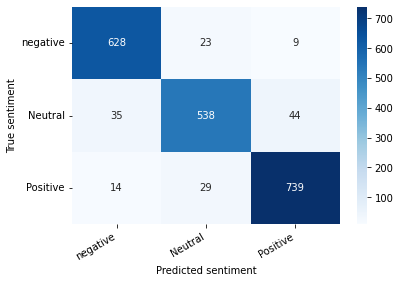

In [ ]:
class_names=['negative', 'Neutral', 'Positive']
def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('True sentiment')
    plt.xlabel('Predicted sentiment');

cm = confusion_matrix(submission['class'], test_data['target'])
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)